# Facebook Ad Analysis

### Goal: See whether or not customer clicked on ad on Facebook or not
### Click = "1",  no click= "0"

<img src="index.png" style="height:350px">

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
%matplotlib inline

In [78]:
df = pd.read_csv("Facebook_Ads_2.csv", encoding = "ISO-8859-1")


In [64]:
df.drop(["Names", "emails"], axis = 1, inplace = True)
df

,Country,Time Spent on Site,Salary,Clicked
0,Bulgaria,25.649648,55330.060060,0
1,Belize,32.456107,79049.076740,1
2,Algeria,20.945978,41098.608260,0
3,Cook Islands,54.039325,37143.355360,1
4,Brazil,34.249729,37355.112760,0
5,Liberia,52.009946,80642.652220,1
6,Syria,42.881370,61908.398150,1
7,Czech Republic,25.676920,29851.411530,0
8,Armenia,40.698233,34281.118780,1
9,Somalia,29.687362,41098.878810,0


In [65]:
Total = len(df["Clicked"])
Number_of_clicks = sum(df["Clicked"])
Click_rate = Number_of_clicks / Total

print("Amount of entries: "+str(Total))
print("Amount of clicks: "+str(Number_of_clicks))
print("Clickrate: "+str(Click_rate))

Amount of entries: 499
Amount of clicks: 250
Clickrate: 0.501002004008016


### Time spent of Facebook vs salary

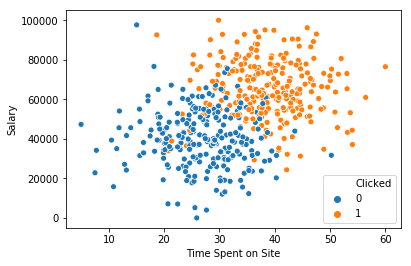

In [66]:
Time = df["Time Spent on Site"]
Salary = df["Salary"]
Clicks = df["Clicked"]
sns.scatterplot(Time, Salary, hue = Clicks);

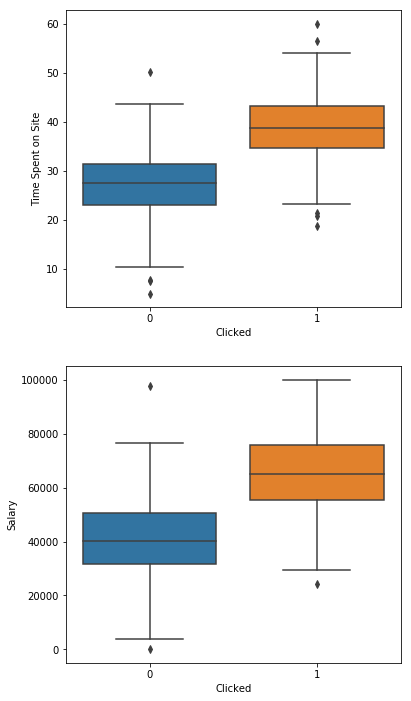

In [67]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.boxplot(Clicks, Time, data = df);
plt.subplot(212)
sns.boxplot(Clicks, Salary, data = df);


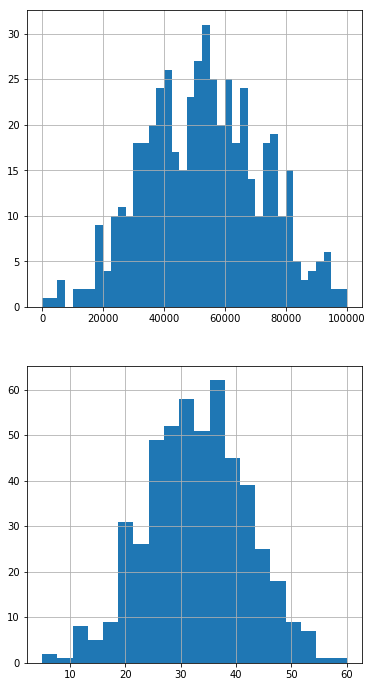

In [68]:
plt.figure(figsize = [6,12])
plt.subplot(211)
Salary.hist(bins = 40);
plt.subplot(212)
Time.hist(bins = 20);

In [69]:
df.drop(["Country"], axis = 1, inplace = True)



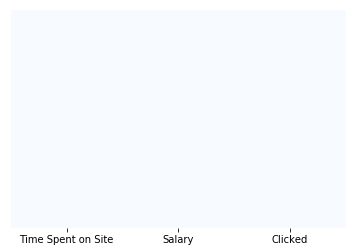

In [70]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues");   #Checking if any NaN left

## Model Training

In [71]:
x = df.drop("Clicked", axis = 1).values
y = Clicks.values

In [72]:
sc = StandardScaler()
x = sc.fit_transform(x)

             precision    recall  f1-score   support

          0       0.93      0.92      0.92       201
          1       0.92      0.93      0.93       198

avg / total       0.92      0.92      0.92       399



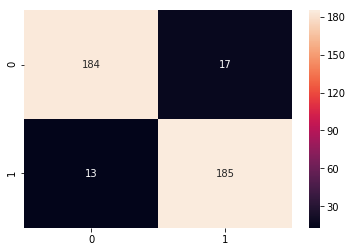

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_predict_train = classifier.predict(x_train)

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True, fmt = "d");
print(classification_report(y_train, y_predict_train))


             precision    recall  f1-score   support

          0       0.83      0.90      0.86        48
          1       0.90      0.83      0.86        52

avg / total       0.86      0.86      0.86       100



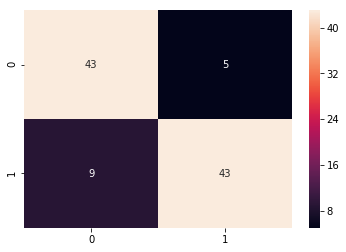

In [74]:
y_predict = classifier.predict(x_test)

cm2 = confusion_matrix(y_test, y_predict) 
sns.heatmap(cm2, annot = True, fmt = "d");
print(classification_report(y_test, y_predict))

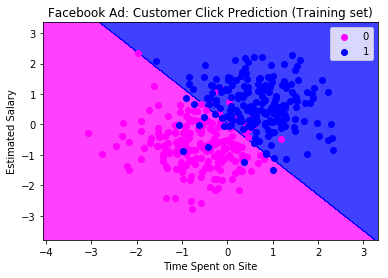

In [75]:
# Visualising the Training set results

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

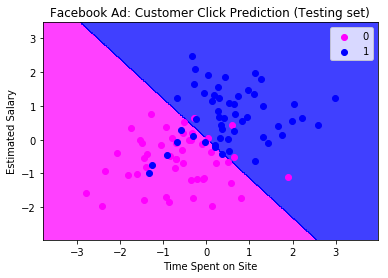

In [76]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()